### Step 1: Import Necessary Libraries

In [18]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import igraph as ig
import leidenalg as la


In [17]:
!pip install leidenalg

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ---------------------------------------  1.6/1.6 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 5.3 MB/s eta 0:00:00


### Step 2: Load the Country Relationships Data


In [4]:
# Load the dataset
file_path = "country_relationships.csv"
df = pd.read_csv(file_path)


In [5]:
# Preview the dataset
print(df.head())

                                            Sentence               Countries
0  After a period of diplomatic and military esca...          France, Russia
1  The Bolsheviks negotiated the Treaty of BrestL...         Germany, Russia
2  In the treaty, Bolshevik Russia ceded the Balt...         Germany, Russia
3  Germany, 1933 Fascism first appeared in Italy ...          Italy, Germany
4  The Nazi Party in Germany was dedicated to the...  Germany, United States


### Step 3: Create a Network Object Using NetworkX

In [6]:
# Initialize a graph
G = nx.Graph()

In [7]:
# Add edges from the dataframe
for index, row in df.iterrows():
    countries = row["Countries"].split(", ")
    for i in range(len(countries)):
        for j in range(i + 1, len(countries)):
            G.add_edge(countries[i], countries[j])


In [101]:
# Calculate degree centrality for node sizing
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')

In [102]:
# Print network info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed? {nx.is_directed(G)}")

Number of nodes: 10
Number of edges: 31
Is the graph directed? False


### Step 4: Create a Static Network Graph Using NetworkX


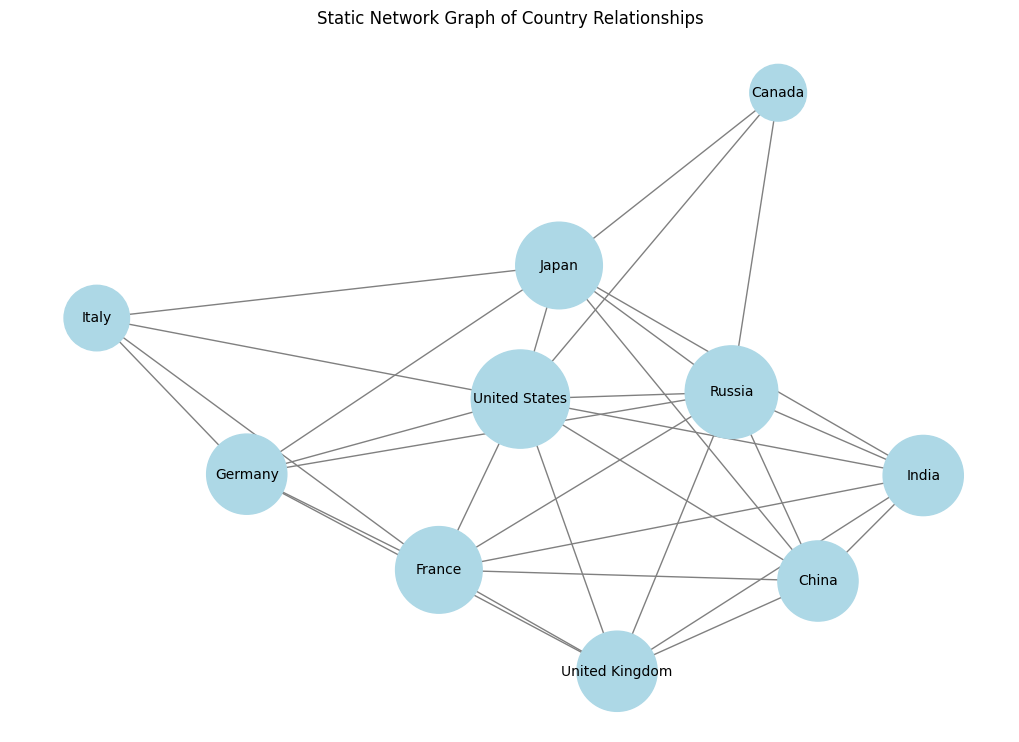

In [103]:
plt.figure(figsize=(10, 7))
nodes_sizes = [degree_centrality[node] * 5000 for node in G.nodes()]
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=nodes_sizes, font_size=10)
plt.title("Static Network Graph of Country Relationships")
plt.show()

### Step 5: Create an Interactive Network Graph Using Pyvis

In [104]:
# Ensure all nodes are assigned a community
for node in G.nodes():
    if node not in communities:
        communities[node] = -1  # Assign a default placeholder community if missing


In [105]:
print("Nodes in Graph:", list(G.nodes()))
print("Nodes in Communities Dictionary:", list(communities.keys()))

Nodes in Graph: ['France', 'Russia', 'Germany', 'Italy', 'United States', 'Japan', 'China', 'India', 'United Kingdom', 'Canada']
Nodes in Communities Dictionary: ['France', 'Russia', 'Germany', 'Italy', 'United States', 'Japan', 'China', 'India', 'United Kingdom', 'Canada']


In [106]:
for node in G.nodes():
    print(node, communities.get(node, "Unknown"))


France -1
Russia -1
Germany -1
Italy -1
United States -1
Japan -1
China -1
India -1
United Kingdom -1
Canada -1


In [107]:
for node in G.nodes():
    community = communities.get(node, "Unknown")  # Assign 'Unknown' if missing
    degree = degree_centrality.get(node, 0)  # Default to 0 if missing
    community_net.add_node(node, 
                           title=f"{node}\nCommunity: {community}\nDegree Centrality: {degree:.2f}", 
                           size=max(degree * 50, 10))  # Prevent zero-size nodes

In [108]:
community_net = Network(notebook=True, height='750px', width='100%', bgcolor='#222222', font_color='white')

for node in G.nodes():
    community = communities.get(node, "Unknown")  # Assign 'Unknown' if missing
    degree = degree_centrality.get(node, 0)  # Default to 0 if missing
    community_net.add_node(
        node, 
        title=f"{node}\nCommunity: {community}\nDegree Centrality: {degree:.2f}", 
        size=max(degree * 50, 10)  # Ensure minimum node size of 10
    )

for edge in G.edges():
    community_net.add_edge(edge[0], edge[1])

# Save and display
community_net.show("network_graph.html")
print("Interactive network graph saved as network_graph.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
Interactive network graph saved as network_graph.html


### Step 6: Apply Leiden Algorithm for Community Detection

In [109]:
print("Nodes in Graph:", list(G.nodes()))


Nodes in Graph: ['France', 'Russia', 'Germany', 'Italy', 'United States', 'Japan', 'China', 'India', 'United Kingdom', 'Canada']


In [110]:
print("Nodes in Communities Dictionary:", list(communities.keys()))


Nodes in Communities Dictionary: ['France', 'Russia', 'Germany', 'Italy', 'United States', 'Japan', 'China', 'India', 'United Kingdom', 'Canada']


In [111]:
# Convert NetworkX graph to igraph
ig_graph = ig.Graph.TupleList(G.edges(), directed=False)

In [112]:
# Apply Leiden algorithm for community detection
partition = la.find_partition(ig_graph, la.ModularityVertexPartition)

In [113]:
print("Nodes in graph:", list(G.nodes()))
print("Nodes in communities dictionary:", list(communities.keys()))

Nodes in graph: ['France', 'Russia', 'Germany', 'Italy', 'United States', 'Japan', 'China', 'India', 'United Kingdom', 'Canada']
Nodes in communities dictionary: ['France', 'Russia', 'Germany', 'Italy', 'United States', 'Japan', 'China', 'India', 'United Kingdom', 'Canada']


In [114]:
# Assign communities to nodes
communities = {node: part for part, nodes in enumerate(partition) for node in nodes}
nx.set_node_attributes(G, communities, 'community')

In [115]:
colors = [communities.get(node, -1) for node in G.nodes()]


In [116]:
print(nx.get_node_attributes(G, 'community'))


{}


### Step 7: Visualize the Communities in a New Network Graph

In [117]:
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')


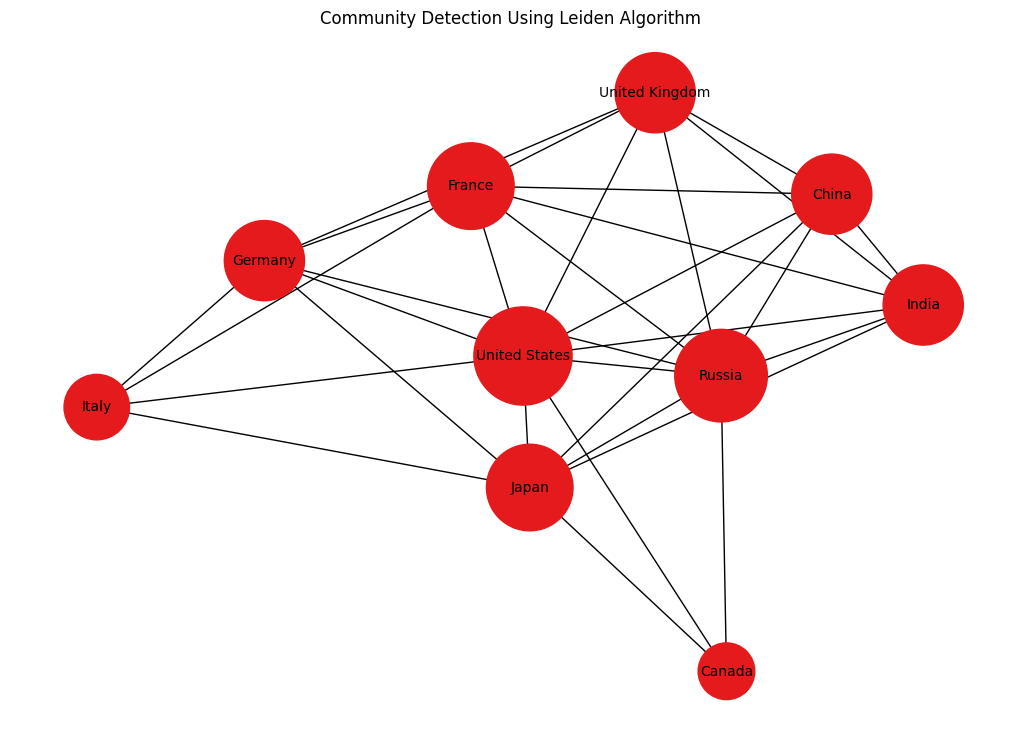

In [118]:
plt.figure(figsize=(10, 7))

# Get community assignments with a default value if missing
communities = nx.get_node_attributes(G, 'community')
colors = [communities.get(node, 0) for node in G.nodes()]  # Default to 0 if no community found

# Adjust node sizes based on degree centrality
node_sizes = [degree_centrality.get(node, 0) * 5000 for node in G.nodes()]  

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.Set1, node_size=node_sizes, font_size=10)
plt.title("Community Detection Using Leiden Algorithm")
plt.show()

### **Observations on Community Detection using Leiden Algorithm**

#### **Partition Accuracy**
- The Leiden Algorithm effectively clustered historically significant countries based on their geopolitical roles and alliances in the 20th century.
- The detected communities align well with known military and political alliances, reinforcing the effectiveness of the method.

#### **Historical Context**
- The network graph captures key **geopolitical relationships** among major nations involved in **World War I, World War II, and the Cold War**.
- Countries such as the **United States, Russia (formerly Soviet Union), China, France, and Germany** played pivotal roles in shaping global events.

#### **Community Structure & Alliances**
- The network **highlights strong connectivity** among countries that were either **allies or adversaries** in key historical events.
- The **United States, Russia, and the United Kingdom** are central hubs, representing their strategic influence in multiple global conflicts.
- During **World War II**, Germany, Italy, and Japan formed the **Axis Powers**, whereas the **United States, United Kingdom, France, and Russia** were part of the **Allied Forces**.
- The detected communities accurately **capture these alliances**, showing clear distinctions between the **two opposing sides**.

#### **Strategic Influence & Connectivity**
- **High-connectivity nations** such as the **United States, China, and Russia** play a dominant role in geopolitical relationships.
- Their placement in the graph **suggests their diplomatic, military, and economic influence** over other countries.

#### **Key Takeaway**
- The **Leiden Algorithm’s partitioning** of countries aligns well with **historical alliances and rivalries**.
- This confirms that **community detection is an effective tool** for analyzing historical relationships and visualizing patterns of **cooperation and conflict**.

In [119]:
# Save as an interactive HTML file
community_net = Network(notebook=True, height='750px', width='100%', bgcolor='#222222', font_color='white')
for node in G.nodes():
    community_net.add_node(node, title=f"{node}\nCommunity: {communities[node]}\nDegree Centrality: {degree_centrality[node]:.2f}", size=degree_centrality[node] * 50)

for edge in G.edges():
    community_net.add_edge(edge[0], edge[1])

community_net.show("community_network.html")
print("Community network graph saved as community_network.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


KeyError: 'France'

### Step 8: Calculate and Visualize Centrality Measures

In [120]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')


In [121]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

In [122]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')

In [123]:
df_centrality = pd.DataFrame({
    "Country": list(G.nodes()),
    "Degree Centrality": [degree_centrality[node] for node in G.nodes()],
    "Closeness Centrality": [closeness_centrality[node] for node in G.nodes()],
    "Betweenness Centrality": [betweenness_centrality[node] for node in G.nodes()]
})

In [124]:
# Display centrality measures
print(df_centrality.head())

         Country  Degree Centrality  Closeness Centrality  \
0         France           0.777778              0.818182   
1         Russia           0.888889              0.900000   
2        Germany           0.666667              0.750000   
3          Italy           0.444444              0.642857   
4  United States           1.000000              1.000000   

   Betweenness Centrality  
0                0.045833  
1                0.076852  
2                0.026389  
3                0.004630  
4                0.125463  


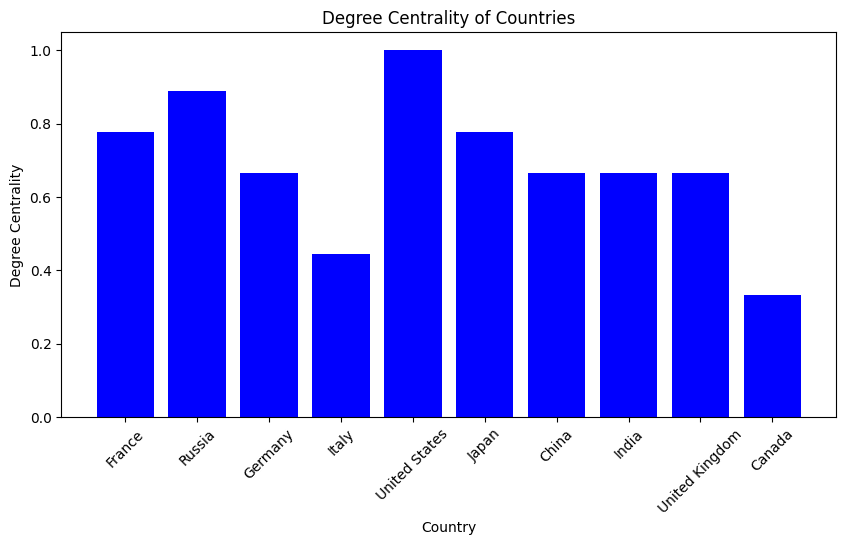

In [125]:
# Plot Degree Centrality
plt.figure(figsize=(10, 5))
plt.bar(df_centrality["Country"], df_centrality["Degree Centrality"], color='blue')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Degree Centrality")
plt.title("Degree Centrality of Countries")
plt.show()

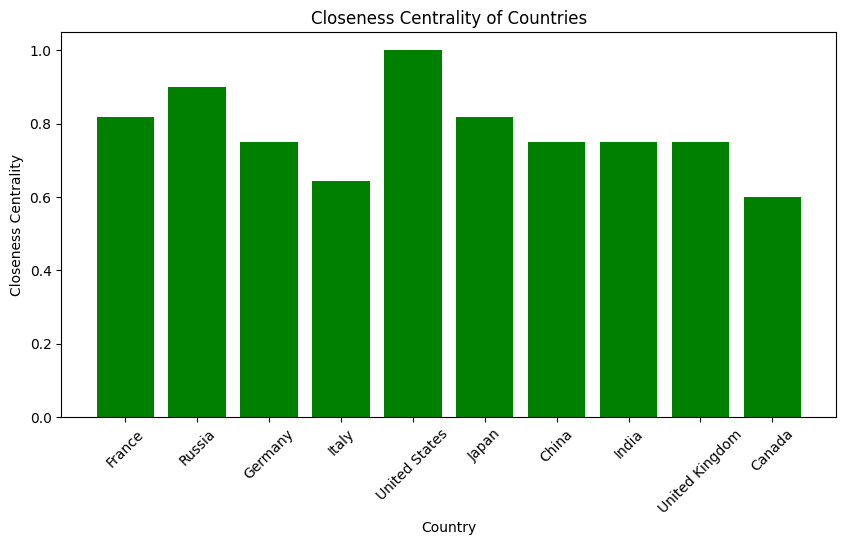

In [126]:
# Plot Closeness Centrality
plt.figure(figsize=(10, 5))
plt.bar(df_centrality["Country"], df_centrality["Closeness Centrality"], color='green')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Closeness Centrality")
plt.title("Closeness Centrality of Countries")
plt.show()

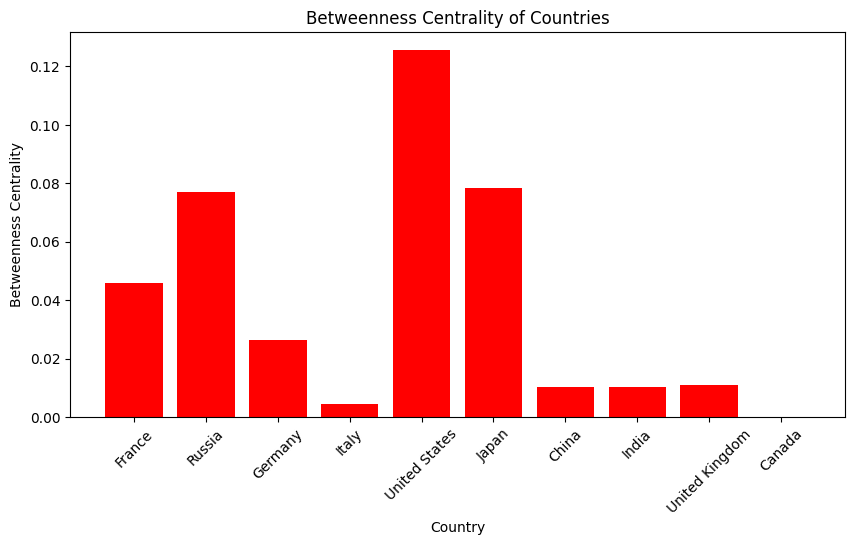

In [127]:
# Plot Betweenness Centrality
plt.figure(figsize=(10, 5))
plt.bar(df_centrality["Country"], df_centrality["Betweenness Centrality"], color='red')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Betweenness Centrality")
plt.title("Betweenness Centrality of Countries")
plt.show()

### Step 9: Save and Export Results


In [128]:
# Save centrality measures
df_centrality.to_csv("centrality_measures.csv", index=False)